# 5. FELADAT

A feladatsort Python nyelven kell megoldani a jupyter notebookban. Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat! Az előre megadott cellákon ne változtassunk!

# Időbeli folyamatok korrelációjának vizsgálata
Elmélet emlékeztető

Időbeli folyamatok vizsgálatakor érdekes kérdés, hogy két változó "mennyire egyszerre" változik, illetve a változások milyen időbeli eltolással követik egymást. Jelöljön $f(t)$ és $g(t)$ két folytonos, de időben diszkréten és véges módon mintavételezett folyamatot. A két folyamat keresztkorrelációs függvényét, mely a $\tau$ _időeltolás_ függvényében adja meg, hogy a két folyamat mennyire egyszerre változik, a következő módon definiálhatjuk:
$$
R_{fg}(\tau) = \sum_t f(t) \, g(t + \tau) = \sum_t f(t - \tau) g(t) \;.
$$
(Bővebben ld. az elméleti anyagban és az érdeklődőbbeknek: https://en.wikipedia.org/wiki/Cross-correlation)

Gyakran érdemes azt vizsgálni, hogy $f(t)$ és $g(t)$ az átlagukhoz képest mennyire térnek ki hasonlóan. 
Az átlagokat levonva az ún. kovariancia-függvényt kapjuk.
Ha pedig a kovariancia függvényt a két jel szórásával is lenormáljuk (ugyanis így egyező jelek esetén 1-et kapnánk), akkor kapjuk a normált korrelációs függvényt:
$$
K_{fg}(\tau) = \frac{1}{\sigma_f \sigma_g} \sum_t \left( f(t) - \mu_f \right) \left( g(t + \tau) - \mu_g \right)\;,
$$
ahol $\mu_f, \mu_g$ a két jel átlaga, $\sigma_f, \sigma_g$ pedig a szórásuk.

Belátható, hogy ha a folyamatokat csak egy időben véges intervallumon ismerjük, akkor a korrelációs függvényt csak egy véges hosszúságú $\tau < \tau_{\mathrm{max}}$ időablakkal érdemes meghatározni. A keresztkorrelációs függvény maximumának megkeresésével megtalálhatjuk azt az időeltolást, amely mellett a két időbeli folyamat a leginkább korrellál.

Amennyiben egy időbeli folyamat korrelációját nem egy másik folyamathoz, hanem saját magához képest vizsgáljuk, úgy  [autokorrelációról](https://en.wikipedia.org/wiki/Autocorrelation) illetve autokovarianciáról beszélünk. Belátható, hogy az autokorrelációs függvény páros, illetve hogy periodikus jelek autokorrelációja periodikus. Nem periodikus jelek esetében az autokorrelációs függvény $\tau = 0$-tól távolodva lecsengő. A lecsengés üteme függ a vizsgált folyamatoktól. Véletlenszerű zajok és kaotikusan viselkedő rendszerek (pontosabban a kaotikus rendszerek erősen keverő fajtája) esetében a lecsengés exponenciálisan gyors. Előfordulnak olyan kaotikus folyamatok is, ahol a korrelációk csak hatványfüggvény szerint csengenek le.

A keresztkorrelációs függvényhez nagyon hasonló módon definiáljuk diszkréten mintavételezett jelek [konvolúcióját](https://en.wikipedia.org/wiki/Convolution):
$$
f(t) \star g(t) = \sum_\tau f(\tau) \, g(t - \tau)
$$

Lineáris rendszerek esetében korábban már láttuk, hogy a konvolúció művelete segítségével igen könnyen meghatározható a rendszer válasza, ha a [Green-függvény](https://en.wikipedia.org/wiki/Green%27s_function) (impulzusválasz) ismert. A konvolúció művelet Fourier-térben szorzásnak felel meg:

$$
(f \star g)(\omega) = f(\omega) g(\omega)
$$

Az autokorrelációs függvény szintén érdekes kapcsolatban áll a Fourier-transzformációval. A [Wiener-Hincsin-tétel](https://en.wikipedia.org/wiki/Wiener–Khinchin_theorem) kimondja, hogy egy függvény autokorrelációs függvényének Fourier-transzformáltja megegyezik a függvény teljesítményspektrumával, azaz Fourier-transzformáltjának abszolút érték négyzetével:

$$
R_{ff}(\omega) = \left| f(\omega) \right|^2
$$

# Feladatok

## Alap 1. feladatrész - Korreláció, konvolúció

a) Írjunk olyan függvényeket, melyek a következő jelalakokat valósítják meg:

* egyetlen $T$ szélességű, $A$ amplitúdójú négyszögimpulzus (boxcar)
* egyetlen $T$ szélességű, $A$ amplitúdójú egyenlő szárú háromszögimpulzus (függőleges szimmetriatengellyel)
* egyetlen $T$ szélességű, $A$ amplitúdójú függőlegesen felfutó, ferdén lefutó háromszögimpulzus
* $T$ periódusidejú, $A$ amplitúdójú négyszögjel

Rajzoljuk fel a jeleket egy megfelelően mintavételezett időtartományon, majd határozzuk meg:

b) mindegyik jel autokorrelációját

c) mindegyik párra a keresztkorrelációját. Mit látunk, ha egy nem szimmetrikus eredménynél megcseréljük a két jelet?

d) mindegyik párra a konvolúciót egyik sorrendben. Mit látunk, ha egy nem szimmetrikus eredménynél megcseréljük a két jelet?

A feladat megvalósításához használjuk a `numpy.correlate` és `numpy.convolve` függvényeket.
A `numpy.correlate` alapértelmezésben a 'valid' üzemmódban működik, amikor csak annyi eltolást enged, aminél az egyik jel időtartama tartalmazza a másikét. Ezért vagy azt kell tennünk, hogy különböző szélességben mintavételezzük a két jelet, vagy a függvényleírásból kikeressük, hogyan lehet átállítani úgy, hogy egyforma szélességűekre is működjön. Az utóbbi esetben a széleffektus elkerülésére/csökkentésére legyen a mintavételezési tartomány elegendően nagy!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

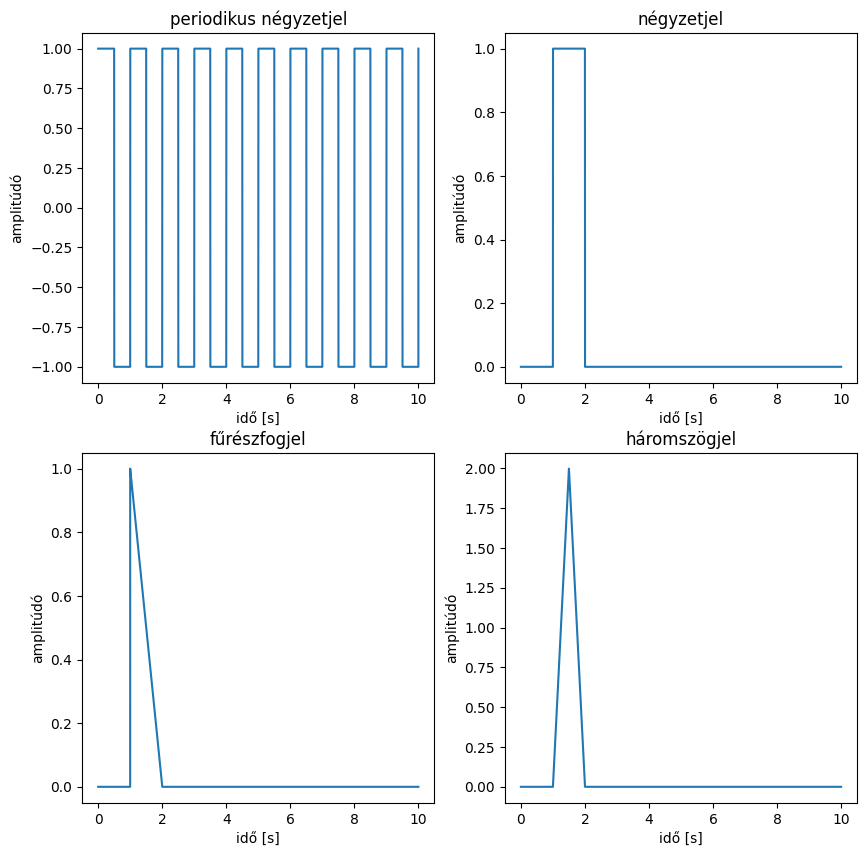

In [3]:
# feladat megoldása
# a) rész
# jelalakok
freq= 1000
Signal_Lenght=10
fig,axis = plt.subplots(2,2,figsize=(10,10))
t = np.linspace(0,Signal_Lenght,Signal_Lenght*freq)

def periodic_squares(T_signal, A,tao,w = 1):
    
    return A*signal.square((t-tao*1000)*(2*np.pi)/T_signal,0.5)
def square(T_signal,A,tao,signal_lenght = Signal_Lenght):
    
    t_signal = np.linspace(0,T_signal,T_signal*freq)
    sig = A*signal.square((t_signal)*(np.pi*2)/T_signal,1)
    sig = np.pad(sig, (0, (signal_lenght-T_signal)*freq), 'constant')
    ind = int(-(1*1000)-(tao*1000))
    sig = np.concatenate((sig[ind:], sig[:ind]))
    return  sig 
def sawtooth(T_signal,A,tao):
    t_signal = np.linspace(0,T_signal,T_signal*freq)
    sig = A*signal.sawtooth((t_signal)*(np.pi)/T_signal,0)
    sig = np.pad(sig, (0, (Signal_Lenght-T_signal)*freq), 'constant')
    ind = int(-(1*1000)-(tao*1000))
    sig = np.concatenate((sig[ind:], sig[:ind]))
    return  sig   
def triangle(T_signal,A,tao):
    t_signal = np.linspace(0,T_signal,T_signal*freq)
    sig = A*signal.sawtooth((t_signal)*(np.pi*2)/T_signal,0.5)+A
    sig = np.pad(sig, (0, (Signal_Lenght-T_signal)*freq), 'constant')
    ind = int(-(1*1000)-(tao*1000))
    sig = np.concatenate((sig[ind:], sig[:ind]))
    return  sig 

# jelalakok
axis[0,0].plot(t,periodic_squares(1,1,0))
axis[0,0].set_title("periodikus négyzetjel")
axis[0,0].set_xlabel("idő [s]")
axis[0,0].set_ylabel("amplitúdó")


axis[0,1].plot(t,square(1,1,0)) 
axis[0,1].set_title("négyzetjel")
axis[0,1].set_xlabel("idő [s]")
axis[0,1].set_ylabel("amplitúdó")


axis[1,0].plot(t,sawtooth(1,1,0))   
axis[1,0].set_title("fűrészfogjel") 
axis[1,0].set_xlabel("idő [s]") 
axis[1,0].set_ylabel("amplitúdó")   


axis[1,1].plot(t,triangle(1,1,0))   
axis[1,1].set_title("háromszögjel") 
axis[1,1].set_xlabel("idő [s]")
axis[1,1].set_ylabel("amplitúdó")


plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


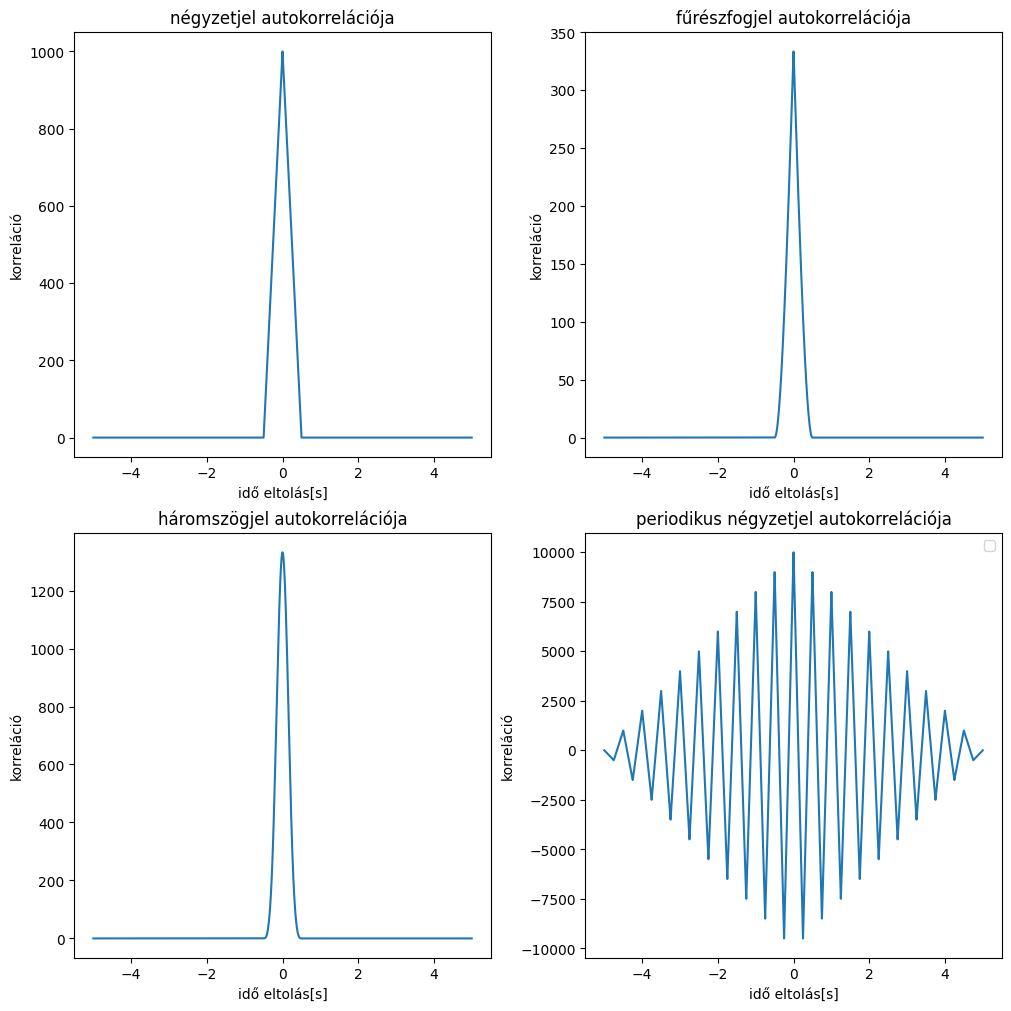

In [4]:
# b) rész
# autokorrelációk

               



corr1 = np.correlate(square(1,1,0),square(1,1,0),mode="full")
corr2 = np.correlate(sawtooth(1,1,0),sawtooth(1,1,0),mode="full")
corr3 = np.correlate(triangle(1,1,0),triangle(1,1,0),mode="full")   
corr4 = np.correlate(periodic_squares(1,1,0),periodic_squares(1,1,0),mode="full")


fig,axis = plt.subplots(2,2,figsize=(10,10), constrained_layout=True)
axis[0,0].plot(np.linspace(-5,5,len(corr1))   ,   corr1)
axis[0,0].set_title("négyzetjel autokorrelációja")
axis[0,0].set_xlabel("idő eltolás[s]")
axis[0,0].set_ylabel("korreláció")

axis[0,1].plot(np.linspace(-5,5,len(corr2))   ,corr2)
axis[0,1].set_title("fűrészfogjel autokorrelációja")
axis[0,1].set_xlabel("idő eltolás[s]")
axis[0,1].set_ylabel("korreláció")

axis[1,0].plot(np.linspace(-5,5,len(corr3))   ,corr3)
axis[1,0].set_title("háromszögjel autokorrelációja")
axis[1,0].set_xlabel("idő eltolás[s]")
axis[1,0].set_ylabel("korreláció")

axis[1,1].plot(np.linspace(-5,5,len(corr4))   ,corr4)
axis[1,1].set_title("periodikus négyzetjel autokorrelációja")
axis[1,1].set_xlabel("idő eltolás[s]")
axis[1,1].set_ylabel("korreláció")



plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


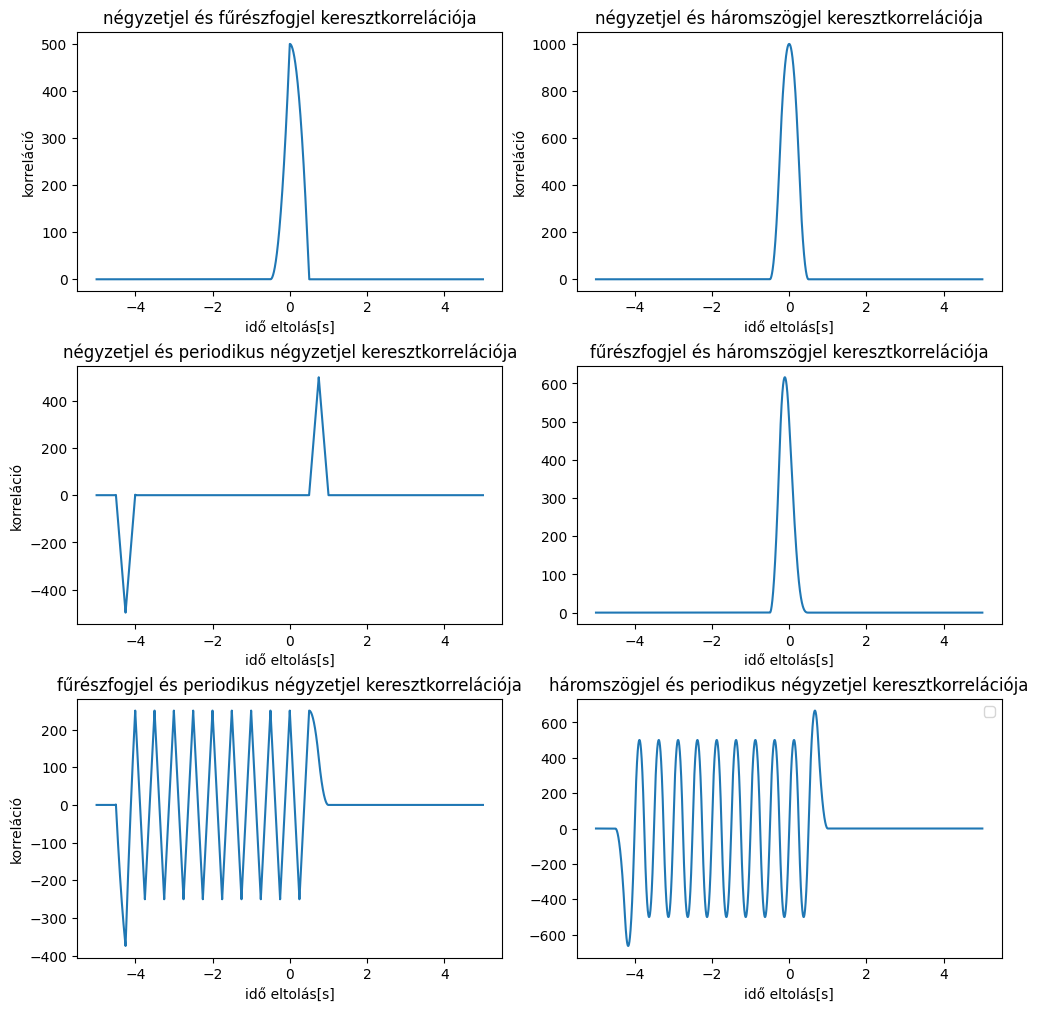

In [5]:
#c) rész
# keresztkorrelációk
xcorr1 = np.correlate(square(1,1,0),sawtooth(1,1,0),mode="full")
xcorr2 = np.correlate(square(1,1,0),triangle(1,1,0),mode="full")
xcorr3 = np.correlate(square(1,1,0),periodic_squares(1,1,0),mode="full")
xcorr4 = np.correlate(sawtooth(1,1,0),triangle(1,1,0),mode="full")
xcorr5 = np.correlate(sawtooth(1,1,0),periodic_squares(1,1,0),mode="full")
xcorr6 = np.correlate(triangle(1,1,0),periodic_squares(1,1,0),mode="full")

fig,axis = plt.subplots(3,2,figsize=(10,10), constrained_layout=True)
axis[0,0].plot(np.linspace(-5,5,len(xcorr1))   ,xcorr1)
axis[0,0].set_title("négyzetjel és fűrészfogjel keresztkorrelációja")
axis[0,0].set_xlabel("idő eltolás[s]")
axis[0,0].set_ylabel("korreláció")

axis[0,1].plot(np.linspace(-5,5,len(xcorr2))   ,xcorr2)
axis[0,1].set_title("négyzetjel és háromszögjel keresztkorrelációja")
axis[0,1].set_xlabel("idő eltolás[s]")
axis[0,1].set_ylabel("korreláció")

axis[1,0].plot(np.linspace(-5,5,len(xcorr3))   ,xcorr3)
axis[1,0].set_title("négyzetjel és periodikus négyzetjel keresztkorrelációja")
axis[1,0].set_xlabel("idő eltolás[s]")
axis[1,0].set_ylabel("korreláció")

axis[1,1].plot(np.linspace(-5,5,len(xcorr4))   ,xcorr4)
axis[1,1].set_title("fűrészfogjel és háromszögjel keresztkorrelációja")
axis[1,1].set_xlabel("idő eltolás[s]")

axis[2,0].plot(np.linspace(-5,5,len(xcorr5))   ,xcorr5)
axis[2,0].set_title("fűrészfogjel és periodikus négyzetjel keresztkorrelációja")
axis[2,0].set_xlabel("idő eltolás[s]")
axis[2,0].set_ylabel("korreláció")

axis[2,1].plot(np.linspace(-5,5,len(xcorr6))   ,xcorr6)
axis[2,1].set_title("háromszögjel és periodikus négyzetjel keresztkorrelációja")

axis[2,1].set_xlabel("idő eltolás[s]")

plt.legend()


Text(0, 0.5, 'korreláció')

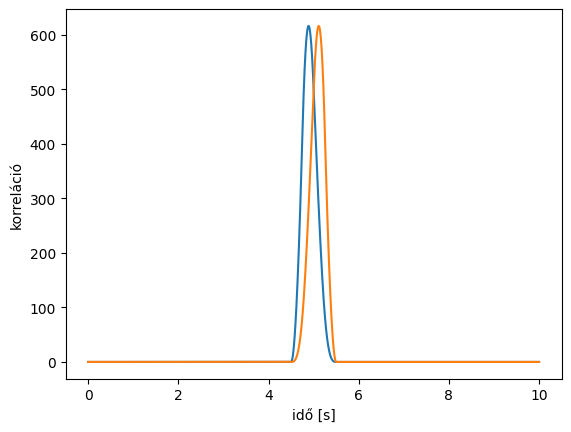

In [29]:
xcorr4b = np.correlate(triangle(1,1,0),sawtooth(1,1,0),mode="full")

plt.plot(np.linspace(-5,5,len(xcorr4))   ,xcorr4,label= "Egy sima")
plt.plot(np.linspace(-5,5,len(xcorr4b))   ,xcorr4b,label= "Egy forditott")
plt.xlabel("idő eltolás[s]")
plt.ylabel("korreláció")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


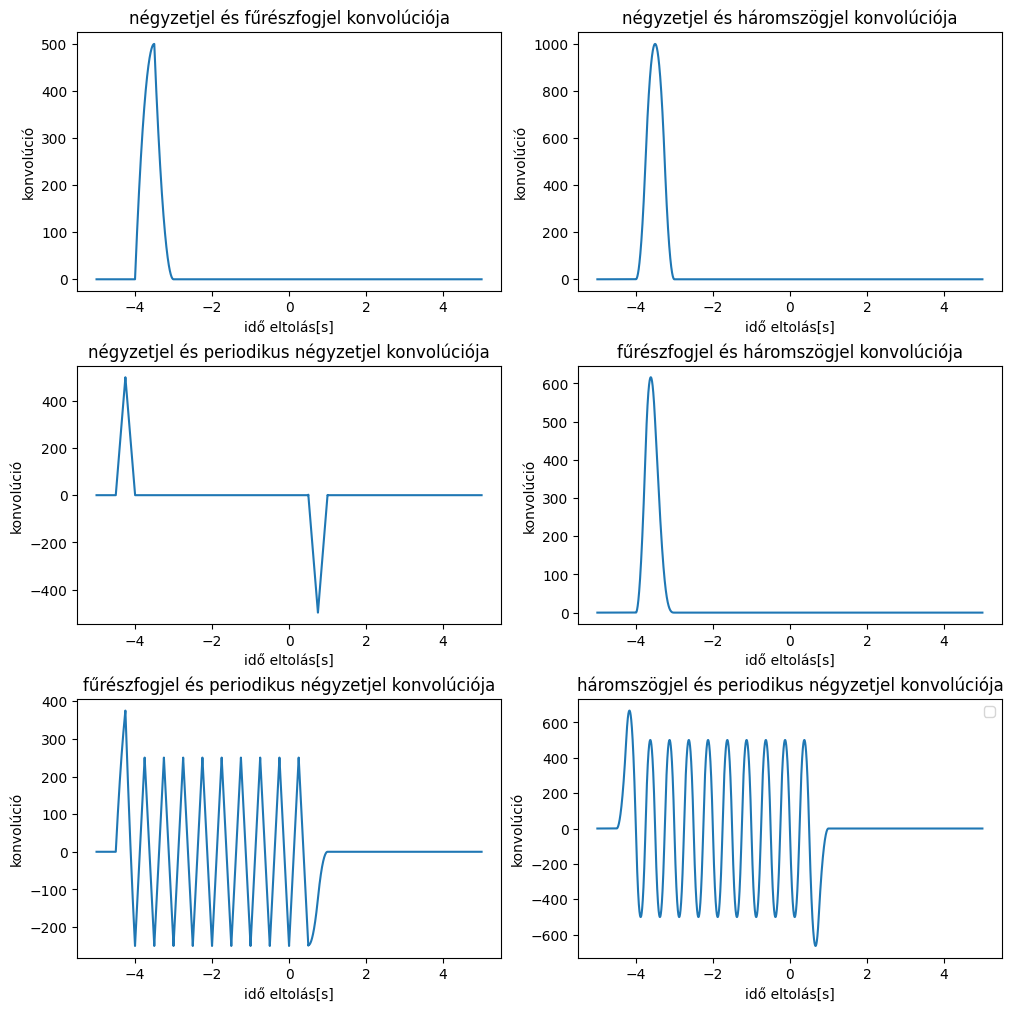

In [6]:
# d) rész
# konvolúciók
xconv1 = np.convolve(square(1,1,0),sawtooth(1,1,0),mode="full")
xconv2 = np.convolve(square(1,1,0),triangle(1,1,0),mode="full")
xconv3 = np.convolve(square(1,1,0),periodic_squares(1,1,0),mode="full")
xconv4 = np.convolve(sawtooth(1,1,0),triangle(1,1,0),mode="full")
xconv5 = np.convolve(sawtooth(1,1,0),periodic_squares(1,1,0),mode="full")
xconv6 = np.convolve(triangle(1,1,0),periodic_squares(1,1,0),mode="full")

fig,axis = plt.subplots(3,2,figsize=(10,10), constrained_layout=True)
axis[0,0].plot(np.linspace(-5,5,len(xconv1))   ,xconv1)
axis[0,0].set_title("négyzetjel és fűrészfogjel konvolúciója")
axis[0,0].set_xlabel("idő eltolás[s]")
axis[0,0].set_ylabel("konvolúció")

axis[0,1].plot(np.linspace(-5,5,len(xconv2))   ,xconv2)
axis[0,1].set_title("négyzetjel és háromszögjel konvolúciója")
axis[0,1].set_xlabel("idő eltolás[s]")
axis[0,1].set_ylabel("konvolúció")

axis[1,0].plot(np.linspace(-5,5,len(xconv3))   ,xconv3)
axis[1,0].set_title("négyzetjel és periodikus négyzetjel konvolúciója")
axis[1,0].set_xlabel("idő eltolás[s]")
axis[1,0].set_ylabel("konvolúció")

axis[1,1].plot(np.linspace(-5,5,len(xconv4))   ,xconv4)
axis[1,1].set_title("fűrészfogjel és háromszögjel konvolúciója")
axis[1,1].set_xlabel("idő eltolás[s]")
axis[1,1].set_ylabel("konvolúció")

axis[2,0].plot(np.linspace(-5,5,len(xconv5))   ,xconv5)
axis[2,0].set_title("fűrészfogjel és periodikus négyzetjel konvolúciója")
axis[2,0].set_xlabel("idő eltolás[s]")
axis[2,0].set_ylabel("konvolúció")

axis[2,1].plot(np.linspace(-5,5,len(xconv6))   ,xconv6)
axis[2,1].set_title("háromszögjel és periodikus négyzetjel konvolúciója")
axis[2,1].set_xlabel("idő eltolás[s]")
axis[2,1].set_ylabel("konvolúció")

plt.legend()



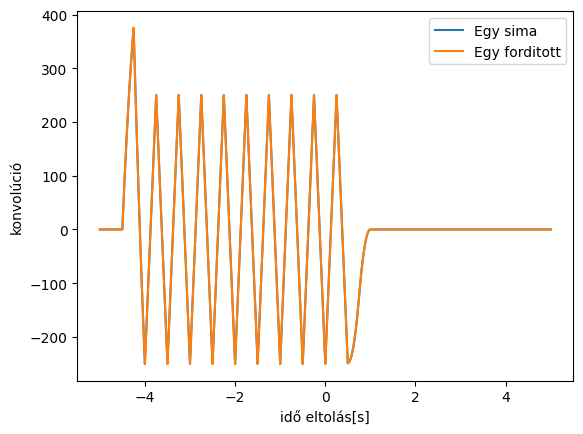

In [7]:
xconv5b = np.convolve(sawtooth(1,1,0),periodic_squares(1,1,0),mode="full")


plt.plot(np.linspace(-5,5,len(xconv5))   ,xconv5,label= "Egy sima")
plt.plot(np.linspace(-5,5,len(xconv5b))   ,xconv5b,label= "Egy forditott")
plt.xlabel("idő eltolás[s]")
plt.ylabel("konvolúció")
plt.legend()

## Alap 2. feladatrész - Hold-radar kísérlet

Ebben és a következő feladatrészekben véletlenszerű folyamatokat fogunk vizsgálni és azt, hogy hogyan lehet ezek elemzésére felhasználni az előző feladatrészben tanultakat. 

Egy érdekes kísérlet, amiben véletlen folyamatnak, és a véletlen jelek statisztikus tulajdonságainak szerepe van, a Hold-radar kísérlet, melynek során a Holdról visszavert radarjeleket tudtak kimutatni.
(Ez néhány hét időkülönbséggel sikerült amerikai és magyar kutatóknak:
https://hu.wikipedia.org/wiki/Magyar_Hold-radar-kísérlet, https://en.wikipedia.org/wiki/Project_Diana)
A nehézség az volt, hogy a visszavert jel gyengesége miatt egyszerű módon nem tudták a vevők által fogott zajos jelből a visszevert jelet kiszűrni. A jelküldés sokszori ismétlésével és a felfogott jelek összegzésével azonban a jel felerősödött a zajhoz képest.

#### Feladat: 
Utánozzuk a Hold-radar kísérletet!
 Küldött jelként valamelyik impulzus jelünket válasszuk, azt egy $t_0$ időpontra eltolva!
Zajként vegyük a legegyszerűbb véletlen jelet, azaz egymás utáni időpillanatokban vett véletlen értékek sorozatát. Az értékek eloszlására a legtermészetesebb eloszlást, normál eloszlást válasszunk!
Felfogott jelként vegyük ezt a zajt, hozzáadva a kimenőjelet további késleltetéssel, és olyan kis amplitúdóval, hogy ábrázolásban ne legyen szemmel látható.

a) Mutassuk meg ábrán, hogy a felfogott jelen még nem látszik az impulzus. Másik ábrán mutassuk ki, hogy a "mérés" sokszori ismétlése és összegzése eredményeképpen az impulzus újra láthatóvá válik!

b) Próbáljuk ki azt is, hogy ha kiszámoljuk a kimenő jel és a felfogott jel korrelációs függvényét, az segít-e a jel jelenlétének kimutatásában! Tehát számoljuk ki és ábrázoljuk az összegzett felfogott jelnek a kimenő jellel vett korrelációs függvényét! Próbáljuk ki, mennyire lehet csökkenteni az ismétlések számát, esetleg el is lehet-e hagyni az ismétlést?

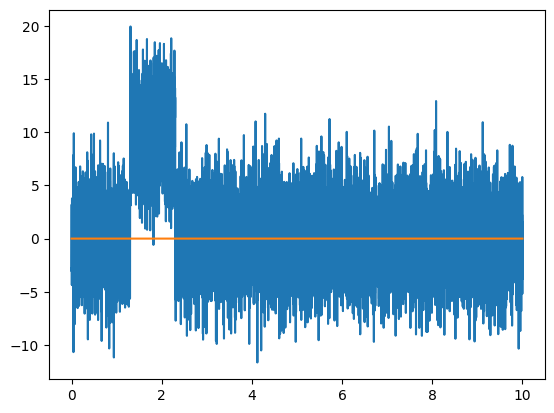

In [9]:
# a) Utánozzuk a Hold-radar kísérletet!ű
def random_signal(T ):
    t = []
    for i in range(T*freq):
        t.append(np.random.normal(0,0.1)) 
    return t  

sig = np.array(square(1,0.01,0.3,10))

def measurment():
    return sig + random_signal(10)
res = np.zeros(10*freq)
for i in range(1000) :
    res += measurment()
plt.plot(np.linspace(0,10,len(res))   ,res)
plt.plot(np.linspace(0,10,len(sig))   ,sig)


Text(0, 0.5, 'korreláció')

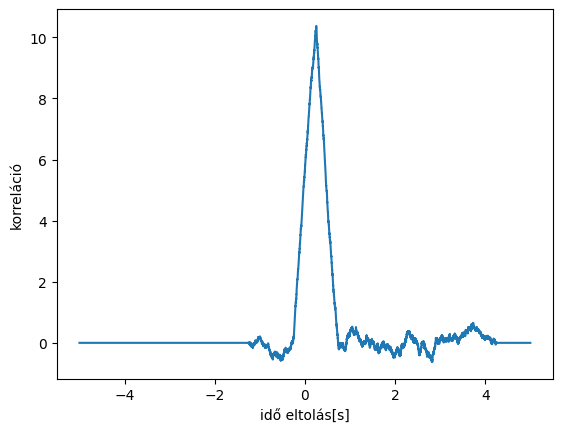

In [10]:
# b) korrelációs függvény használata

sig_out = np.array(square(1,0.01,0.5,10))
sig_in = np.array(square(1,0.01,1,10)) + random_signal(10) 
sig_big = np.zeros(10*freq)
for i in range(100):
    sig_big  +=  (np.array(square(1,0.01,1,10)) + random_signal(10))


sig_corr = np.correlate(sig_big,sig_out,"full")


plt.plot(np.linspace(-5,5,len(sig_corr))   ,sig_corr)
plt.xlabel("idő eltolás[s]")
plt.ylabel("korreláció")




## Teljes 3. feladatrész - Véletlen bolyongás

Bonyolultabb véletlen folyamatok egyik fajtája a véletlen bolyongás, melyben egy "részecske" valamilyen valószínűségi eloszlás szerint meghatározott lépések megtételével mozog egy, kettő vagy több dimenzióban.
A diszkrét időlépésekben történő bolyongást gyakran a [Brown-mozgás](https://en.wikipedia.org/wiki/Brownian_motion) egyszerű leírására használjuk.
Az egyszerű bolyongás esetén az időfejlődést leíró egyenlet
$$ x(t_{k+1}) = x(t_k) + \xi_k\;,\;\; \mbox{azaz}\;\;\;\; x(t_k) = \sum_{j=0}^{k-1} \xi_j\;, $$
ahol $\xi_k$ a véletlen változó.

Az időben folytonos véletlen folyamatokat ún. sztochasztikus differenciálegyenletekkel írjuk le.
Például a véletlen bolyongás határesete a Wiener-folyamat, melynek egyenlete
$$
\dot x = \xi(t)\;,
$$
ahol $\xi(t)$ a véletlenszerű fehér zajt reprezentálja.

#### Feladatok

a)
Írjunk egy `randomwalk` függvényt, amely megadott $N$-re szimulál egy $N$ lépéses egydimenziós véletlen bolyongást normál eloszlású véletlen lépésekkel! Ábrázoljuk a folyamat egy szakaszát úgy, hogy a bolyongás tipikus viselkedése jól megfigyelhető legyen.

b)
Mutassuk meg, hogy a bolyongás során a kiindulási ponttól való eltávolodásnak a várható értéke arányos a lépésszám négyzetgyökével!

Text(0, 0.5, 'x-koordináta')

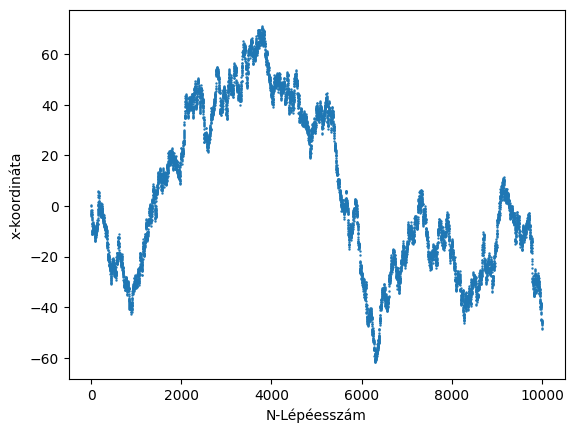

In [35]:
# a) randomwalk függvény, véletlen bolyongás
def randomwalk(N):
    x = []
    for i in range(N):
        if i == 0:
            x.append(0)
        else:
            x.append( x[i-1] + np.random.normal(0,1))
    return x
x = np.linspace(0,10000,10000)
path = randomwalk(10000)

plt.scatter(x,path,s=0.5)
plt.xlabel("N-Lépéesszám")
plt.ylabel("x-koordináta")

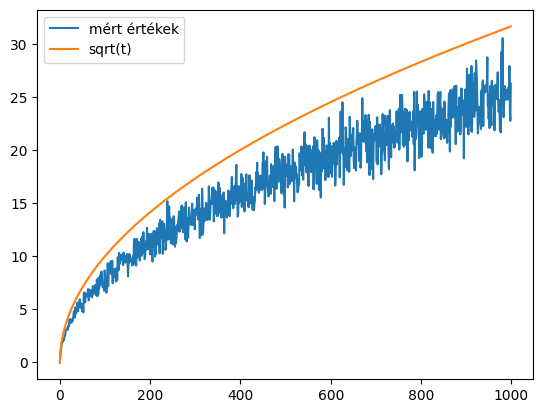

In [24]:
# b) sqrt(t) függés ellenőrzése
distance = []
for i in range(1000):
    distance_temp = []
    for j in range(100):
        
        ut =randomwalk(i+1)     
        distance_temp.append(ut[0]-ut[-1])
        
    distance.append(np.mean(np.abs(distance_temp)))
                    
x = np.linspace(0,1000,1000)
plt.plot(distance,label="mért értékek")
plt.plot(np.sqrt(x),label="sqrt(t)")
plt.legend()
plt.xlabel("N-Lépéesszám")
plt.ylabel("x-koordináta átlagos eltérése")                        

## Teljes 4. feladatrész - Stacionárius véletlen folyamatok


A véletlen folyamatok közül fontosak a stacionáriusak, amelyeknél a felvett $x$ értékek hosszú időre meghatározott eloszlásfüggvénye invariáns az időeltolásra. Ez a tulajdonság az egyszerű bolyongásra és a Wiener-folyamatra nem teljesül, mivel a koordináta értékek eloszlása egyre szélesedik.
A Brown mozgást végző részecske sebességének valószínűségeloszlása azonban stacionárius, ha a sebesség minden határon túli növekedésének a közeg viszkozitása gátat szab.
Ezt folytonos időre írja le az ún. [Ornstein-Uhlenbeck-folyamat](https://en.wikipedia.org/wiki/Ornstein–Uhlenbeck_process), aminek differenciálegyenlete
$$ \dot v = - \gamma v + D\cdot\xi(t)\;,$$
ahol $\gamma$ és $D$ pozitív konstansok, melyek a csillapítás erősségét, illetve a folyamat diffúzivitását adják meg, $\xi(t)$ továbbra is fehér zaj.
Talán könyebben megérthető ennek időben diszkretizált változata:
$$ v(t_{k+1}) = (1-\alpha)\cdot v(t_k) + D\cdot\xi_k\;,\;\;\alpha=\gamma \Delta t\;,$$
amiben az első tag szemléletesen a sebesség csillapodását írja le  $\alpha\ll 1$ esetére. A második pedig az időlépés alatt a közeg részecskéivel történt ütközések eredő hatását adja meg (valójában az utóbbi függ a részecske sebességétől, de ez a hatás átlagolva az első tagba van beleértve). Vegyük észre, hogy a fenti képlet alapján sebesség időfejlődése két paramétertől függ: az $\alpha$-tól és $D$-től.
Érdemes megjegyezni, hogy a sebesség időfejlődése hasonlít a véletlen bolyongáshoz, és azzá is válik a $\gamma=0$ határesetben.

#### Feladatok

a) Írjunk egy  `brownian` függvényt, amely  az egydimenziós csillapított Brown-mozgás sebességét szimulálja és segítségével ábrázoljuk  azt az  idő függvényében!

b) Határozzuk meg a Brown-mozgás sebességének autokorrelációs függvényét $\alpha=0.01$ és $D=1$ értékekre és ábrázoljuk! Mivel ez egy  véletlen folyamat,  az autokorreláció értékei erősen véletlenszerűek. Végezzük el a szimulációt és számolást elegendően sokszor, és ellenőrizzük, hogy ha az eredményeket összeátlagoljuk egymással, az átlag valóban simább, mint az átlagolás nélküli korrelációs függvény! 

c) Hogyan függ a korrelációk lecsengése a mozgás paramétereitől? Vizsgáljuk meg egy, a fentebb használt $\alpha$ értéknél kisebb,  és egy nála nagyobb $\alpha$-ra ezt a kérdést! Ezután egy adott $\alpha$ érték mellett vegyünk még két  különböző $D$ értéket!  Foglaljuk össze röviden szavakban, hogy mit tapasztalunk!

d) Határozzuk meg  a Brown-mozgás sebességének teljesítményspektrumát! A b) részhez hasonlóan itt is mutassuk ki, 
hogy a többszöri lefuttatás során kapott teljesítményspektrumok átlaga simább, mint egy lefutásé!

e) Mutassuk meg  a csillapított Brown-mozgás esetére, hogy igaz a Wiener-Hincsin-tétel, azaz, hogy az autokorrelációs függvény Fourier-transzformáltjának abszolút értéke megegyezik a teljesítményspektrummal! Itt is próbáljuk ki az átlagolást!

Text(0, 0.5, 'sebesség')

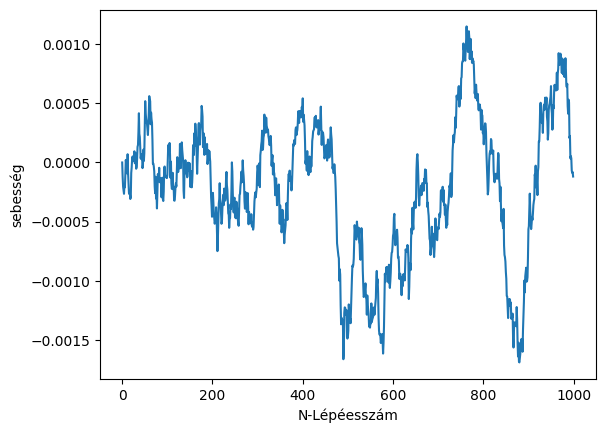

In [19]:
# a)  Brown-mozgás 
def brownian(N,alpha,D):
    v= []
    for i in range(N):
        if i == 0:
            v.append(0)
        else:
            v.append( (1-alpha)*v[i-1] + D*np.random.normal(0,0.001))
    return v 
velocity = brownian(1000,0.01,0.1) 
plt.plot(velocity) 
plt.xlabel("N-Lépéesszám")
plt.ylabel("sebesség")     

Text(0, 0.5, 'Autokorrelációs függvény')

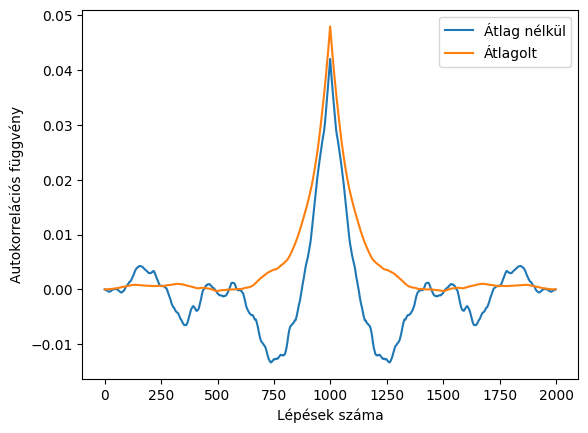

In [20]:
# b) a Brown-mozgás sebességének autokorrelációs függvénye és átlaga
x = brownian(1000,0.01,1)
autokorr = np.correlate(x,x,mode="full")
plt.plot(autokorr,label= "Átlag nélkül")
res = []
for i in range(100):
    x_temp = brownian(1000,0.01,1)
    res.append(np.correlate(x_temp,x_temp,mode="full"))
plt.plot(np.mean(res,axis=0),label="Átlagolt")   
plt.legend()
plt.xlabel("Lépések száma")
plt.ylabel("Autokorrelációs függvény")

Text(0, 0.5, 'Autokorrelációs függvény')

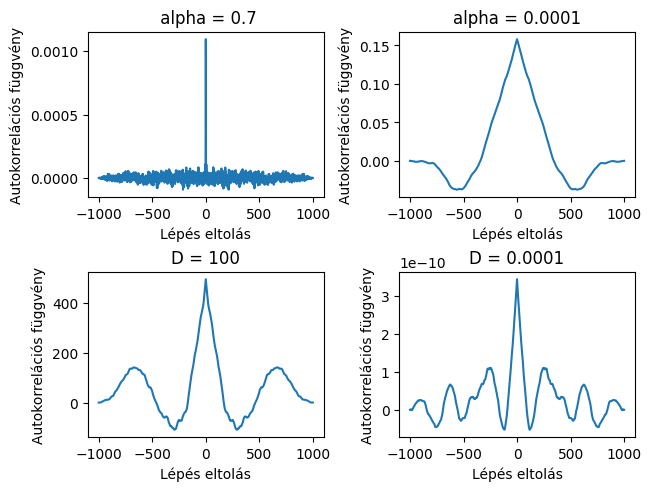

In [21]:
# c) paraméterektől való függés
fig, axs = plt.subplots(2, 2, constrained_layout=True)
brown_bigalpha = brownian(1000,0.7,1)  
bigalpha_korr = np.correlate(brown_bigalpha,brown_bigalpha,mode="full")
axs[0,0].plot(np.linspace(-1000,1000,len(bigalpha_korr)),bigalpha_korr)
axs[0,0].set_title(" alpha = 0.7")
axs[0,0] . set_xlabel("Lépés eltolás")   
axs[0,0] . set_ylabel("Autokorrelációs függvény")

brown_smallalpha = brownian(1000,0.0001,1) 
smallalpha_korr = np.correlate(brown_smallalpha,brown_smallalpha,mode="full")
axs[0,1].plot(np.linspace(-1000,1000,len(smallalpha_korr)),smallalpha_korr) 
axs[0,1].set_title("alpha = 0.0001")
axs[0,1] . set_xlabel("Lépés eltolás")
axs[0,1] . set_ylabel("Autokorrelációs függvény")


brown_bigD = brownian(1000,0.01,100)
bigD_korr = np.correlate(brown_bigD,brown_bigD,mode="full")
axs[1,0].plot(np.linspace(-1000,1000,len(bigD_korr)),bigD_korr)
axs[1,0].set_title("D = 100")
axs[1,0] . set_xlabel("Lépés eltolás")
axs[1,0] . set_ylabel("Autokorrelációs függvény")

brown_smallD = brownian(1000,0.01,0.0001)
smallD_korr = np.correlate(brown_smallD,brown_smallD,mode="full")
axs[1,1].plot(np.linspace(-1000,1000,len(smallD_korr)),smallD_korr)
axs[1,1].set_title("D = 0.0001")
axs[1,1] . set_xlabel("Lépés eltolás")
axs[1,1] . set_ylabel("Autokorrelációs függvény")




Text(0, 0.5, 'Teljesítményspektrum')

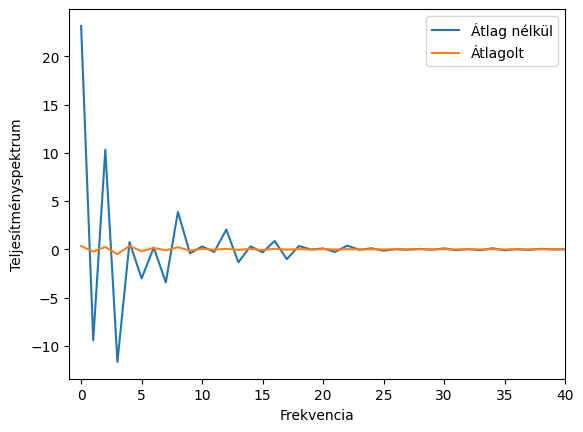

In [22]:
# d) teljesítményspektrum és átlag 
x = brownian(1000,0.01,1)
autokorr = np.correlate(x,x,mode="full")
def power_spectrum(x):
        return np.fft.fft(x)   
plt.plot(power_spectrum(autokorr),label="Átlag nélkül")
for i in range(10):
        x_temp = brownian(1000,0.01,1)
        res.append(power_spectrum(np.correlate(x_temp,x_temp,mode="full")))
plt.plot(np.mean(res,axis=0),label="Átlagolt")
plt.xlim(-1,40)
plt.legend()
plt.xlabel("Frekvencia")
plt.ylabel("Teljesítményspektrum")

(-1.0, 40.0)

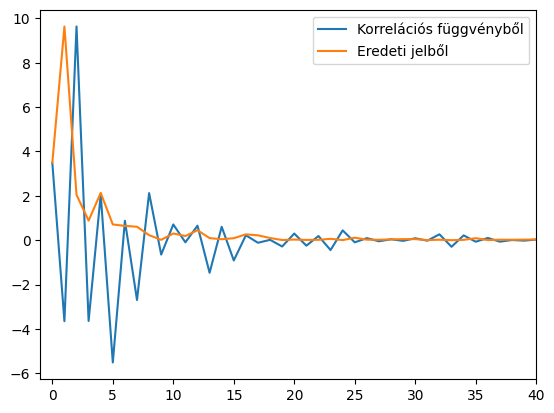

In [23]:
# e) a Wiener-Hincsin-tétel ellenőrzése
x = brownian(1000,0.01,1)
autokorr_x = np.correlate(x,x,mode="full")
power1 = np.fft.fft(autokorr_x)
power2 = np.abs(np.fft.fft(x))**2
plt.plot(power1,label="Korrelációs függvényből")
plt.plot(power2,label="Eredeti jelből")

plt.legend()
plt.xlim(-1,40)
plt.xlabel("Frekvencia")
plt.ylabel("Teljesítményspektrum")  





(-1.0, 40.0)

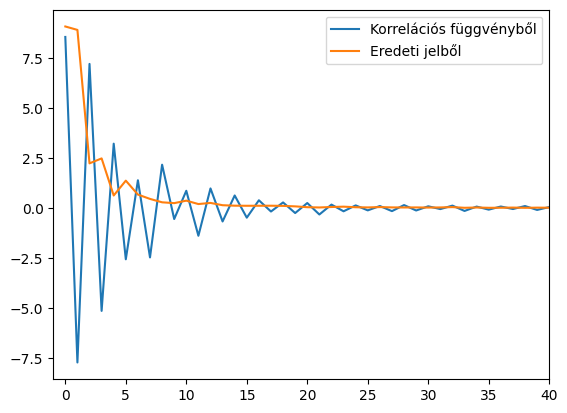

In [18]:
power1_mean = []
for i in range(10):
    x_temp = brownian(1000,0.01,1)
    power1_mean.append(np.fft.fft(np.correlate(x_temp,x_temp,mode="full")))  
power2_mean = []    
for i in range(10):
    x_temp = brownian(1000,0.01,1)
    power2_mean.append(np.abs(np.fft.fft(x_temp))**2)

plt.plot(np.mean(power1_mean,axis=0),label="Korrelációs függvényből")
plt.plot(np.mean(power2_mean,axis=0),label="Eredeti jelből") 
plt.legend()
plt.xlim(-1,40) 
plt.xlabel("Frekvencia")
plt.ylabel("Teljesítményspektrum")  


## <font color='green5'>5. Szorgalmi feladatrész: Kaotikus rendszer vizsgálata</font>

A kaotikus rendszerek  a véletlen folyamatok egy másik példáját mutatjál. Ebben az esetben a rendszert leíró  egyenlet teljesen determinisztikus, hosszú távon mégis véletlenszerű viselkedést tapasztalhatunk.

A logisztikus leképezés az egyik legegyszerűbb kaotikus viselkedést mutató rendszer, melyet a következő iteratív formula definiál (az érdeklődőbbek olvashatnak [róla itt](https://en.wikipedia.org/wiki/Logistic_map)):

$$
x_{t + 1} = r \, x_t \left( 1 - x_t \right)
$$

Az $r$ érték egy ún. kontrollparaméter, amelytől függ, hogy a rendszer milyen viselkedést mutat, pl. hosszú távon periodikussá válik, vagy kaotikus viselkedést mutat. A kaotikus viselkedés $r_c \approx 3.56995$ és a maximális $r_{max}=4$ érték között figyelhető meg. Ezt a kaotikus viselkedést megszakítják olyan intervallumok, u.n. periódikus ablakok, ahol periódikus viselkedés figyelhető meg, amint a kinagyított [bifurkációs diagramon](https://en.wikipedia.org/wiki/Logistic_map#/media/File:Subsection_Bifurcation_Diagram_Logistic_Map.png)
jól látszik. A bifurkációs diagram a paraméter függvényében mutatja, hogy az egyes paraméterértékeknél a rendszer hosszútávú viselkedése során milyen $x$ értékeket jár be.
E rendszer az $r_{max}$ értéknél a legerősebben kaotikus.

A kaotikus rendszerek egy részének érdekes jellemzője, hogy bizonyos kontrollparaméter mellett ún. [intermittens](https://en.wikipedia.org/wiki/Intermittency) viselkedést mutatnak. Ilyenkor a rendszer váratlanul hosszabb vagy rövidebb ideig közel periodikus viselkedést mutat, majd idővel újra beáll a káosz, és ez a kettő váltakozik.
Ilyen a logisztikus leképezésben a periódikus ablakoktól kevéssel balra figyelhető meg, pl. $r=3.828$ értéknél, de $r$ értékét tovább csökkentve $r=3.8$-nál már ez a jelenség lényegében eltűnt.

Feladatok:

a) Írjunk függvényt, mely megvalósítja a fent definiált logisztikus leképezést.
Ábrázoljuk a folyamatot az $r$ kontrollparaméter néhány különböző értéke mellett.
Válasszuk ehhez a fent említett erősen kaotikus és intermittens esetet, és keressünk egy-egy hozzájuk hasonlót!

b) Bővítsük az előbbi vizsgálatokat az autokovariancia függvény meghatározásával, és ábrázoljuk, hogyan cseng le a korreláció ezekben az esetekben!

In [19]:
# a)
# A logisztikus leképezést megvalósító függvény

In [20]:
# a,b)
# A logisztikus leképezés tulajdonságainak vizsgálata